In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from datetime import datetime
from keras.models import load_model, Model
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from keras.optimizers import Adam
from misc.utils import generate_generator, gen_imgPaths_and_labelPaths, monitor_mae, monitor_mse, \
                       sample_predictions, first_predictions, calc_mae_mse, get_profile
from sklearn.model_selection import train_test_split

%matplotlib inline
np.random.seed(31415)

Using TensorFlow backend.


In [2]:
get_profile('./weights/mae_11.63_mcnn_all_masks_val.hdf5')
get_profile('./weights/mae_14.89_mcnndsh_all_masks_val.hdf5')
get_profile('./weights/mae_18.48_mcnnds_all_masks_val.hdf5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`

Profile:
---------
FLOPS: 1,534,983
Mult-Adds: 767,491
Trainsable params: 127,953

Profile:
---------
FLOPS: 449,691
Mult-Adds: 224,845
Trainsable params: 37,504

Profile:
---------
FLOPS: 144,303
Mult-Adds: 72,151
Trainsable params: 12,060


In [5]:
model1 = load_model('./weights/mae_11.63_mcnn_all_masks_val.hdf5', custom_objects={
                    'monitor_mae': monitor_mae, 'monitor_mse': monitor_mse})

model2 = load_model('./weights/mae_14.89_mcnndsh_all_masks_val.hdf5', custom_objects={
                    'monitor_mae': monitor_mae, 'monitor_mse': monitor_mse})

model3 = load_model('./weights/mae_18.48_mcnnds_all_masks_val.hdf5', custom_objects={
                    'monitor_mae': monitor_mae, 'monitor_mse': monitor_mse})

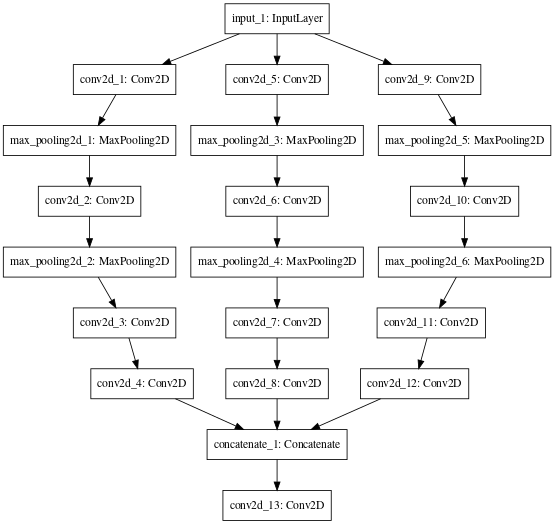

In [6]:
tf.keras.utils.plot_model(
    model1, to_file='mcnn.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=60
)

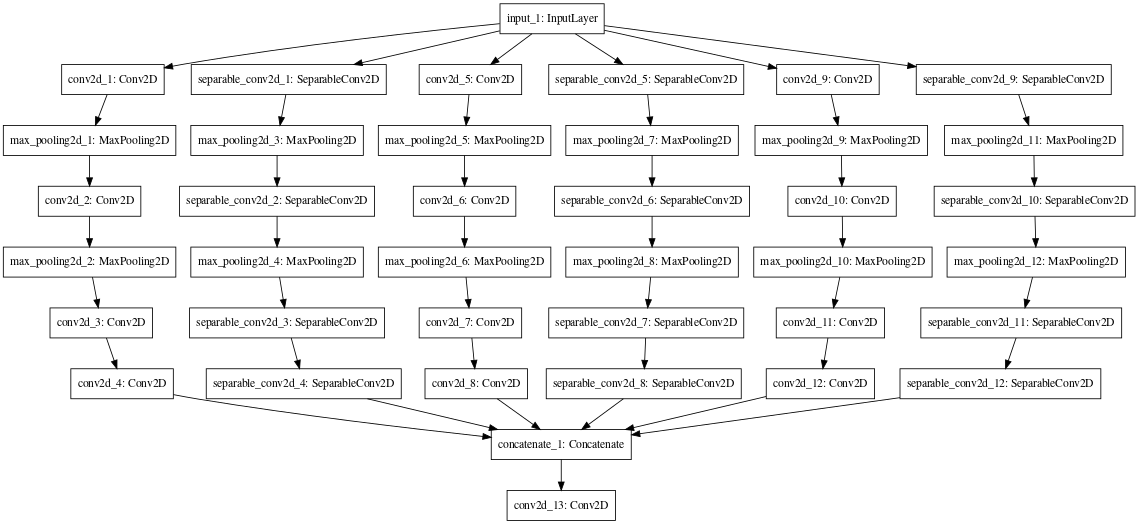

In [10]:
tf.keras.utils.plot_model(
    model2, to_file='mcnndsh.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=60
)

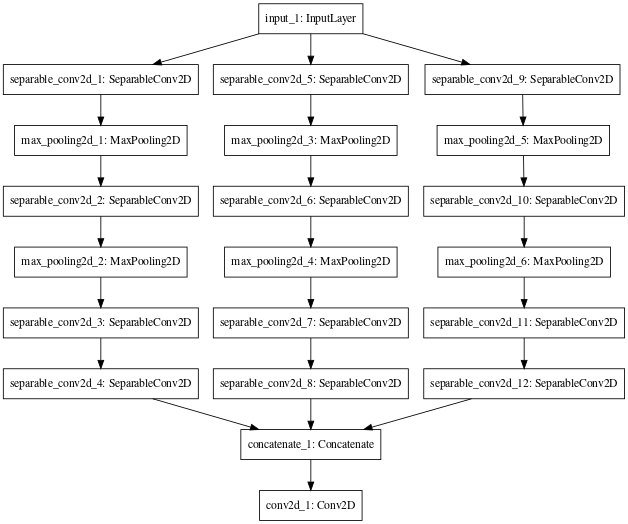

In [11]:
tf.keras.utils.plot_model(
    model3, to_file='mcnnds.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=60
)